In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Flatten, Reshape
from tensorflow.keras import regularizers

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung


In [4]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [5]:
# Loads the training and test data sets (ignoring class labels)
(x_train, _), (x_test, _) = mnist.load_data()
# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
(x_train.shape, x_test.shape)

((60000, 28, 28), (10000, 28, 28))

In [8]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [9]:
(x_train.shape, x_test.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
# Deep Autoencoder
autoencoder = Sequential()
# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu',
padding='same',

input_shape=x_train.shape[1:])) # [28,28]
autoencoder.add(MaxPooling2D((2, 2), padding='same')) #[14,14]
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same')) # [7, 7]
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2),
activation='relu', padding='same')) #[4,4]
# Flatten encoding for visualization
autoencoder.add(Flatten())
# https://keras.io/layers/core/
autoencoder.add(Reshape((4, 4, 8))) # Reshapes an output to a certain shape.
# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# https://keras.io/layers/convolutional/
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [11]:
# Encoder Model
encoder = Model(inputs=autoencoder.input,
outputs=autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584   

In [ ]:
# trong truong hop thuc thi lau, can co checkpoint
# define the checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve any
early_stopping_monitor = EarlyStopping(patience=10)
filepath = "auto_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss',
verbose=1,

save_best_only=True,
mode='min')

callbacks_list = [checkpoint, early_stopping_monitor]
# Train the model
# autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_siz
# epochs=epochs,verbose=1,validation_data=(va
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
epochs=100,
batch_size=128,
validation_data=(x_test, x_test),
callbacks=callbacks_list)

In [13]:
num_images = 10
np.random.seed(1)
random_test_images = np.random.randint(x_test.shape[0],
size=num_images)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

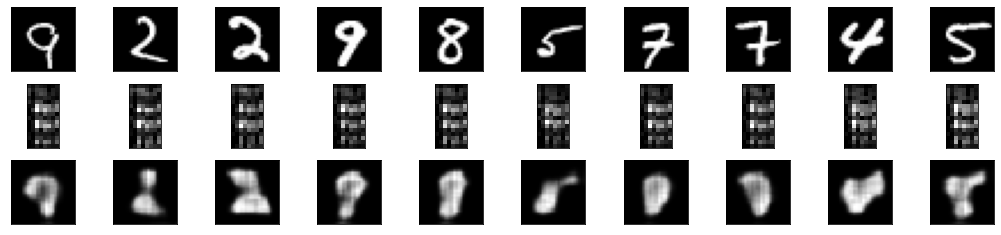

In [14]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
# # save model
# autoencoder.save('CNN_decoder.h5')
# #print("save!!!")

In [16]:
# encoder.save('CNN_encoder.h5')

In [17]:
# # Predicting on Test Data, model load from file
# from tensorflow.keras.models import load_model
# encoder = load_model('CNN_encoder.h5')
# decoder = load_model('CNN_decoder.h5')

In [ ]:
num_images = 5
np.random.seed(1)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(x_test)

In [ ]:
plt.figure(figsize=(18, 4))
for i, image_idx in enumerate(random_test_images):
# plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
for i, image_idx in enumerate(random_test_images):

# plot reconstructed image
plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
plt.gray()
image_name = "demo_CNN/image_" + str(image_idx) + ".jpg"
plt.savefig(image_name)
plt.show()